# Metro Ridership Background Information (2024)

**Source**: [WMATA Metrorail Ridership Summary](https://www.wmata.com/initiatives/ridership-portal/Metrorail-Ridership-Summary.cfm)

---

#### Average (M-Sun) Daily Entries Per Day over the Whole Year
- **Total Average**: 394,582

#### Average Daily Entries Over All Stations by Day of the Week
- **Mondays**: 339,775
- **Tuesdays**: 423,610
- **Wednesdays**: 427,648
- **Thursdays**: 420,062
- **Fridays**: 362,359
- **Saturdays**: 270,954
- **Sundays**: 204,772

**Observation**:  
- **Highest**: Mid-week (Tuesday to Thursday)  
- **Lowest**: Weekends  
- **Assumption**: A large portion of people primarily use the metro for commuting.

---

#### Average Daily Entries of All Stations by Month in 2024
- **January**: 288,410
- **February**: 328,881
- **March**: 372,934
- **April**: 384,630
- **May**: 363,360
- **June**: 360,303
- **July**: 356,562
- **August**: 329,019
- **September**: 365,487
- **October**: 400,764
- **November**: 333,920
- **December**: 314,386

---

#### Average Daily Entries by Season
- **Spring (March, April, May)**: 373,641
- **Summer (June, July, August)**: 348,628
- **Fall (September, October, November)**: 366,723
- **Winter (December, January, February)**: 310,559

**Observation**:  
- **Least Busy**: Summer and Winter  
- **Most Busy**: Fall and Spring
- **17% decrease in ridership** between Spring and WInter


In [2]:
#opening all datasets into dfs
import pandas as pd

#import statements for running visualizations
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#INITIAL DATASETS (entries only)
#data regarding location and specs of each metrorail station
stations_df = pd.read_csv("metro_stations.csv") 

#dataset on Average daily entries by station by month for all days of the week in 2024
av_by_month_df = pd.read_csv("All_Months.csv") 

#compiled average annual daily entries for all days, weekdays, and weekends in respective order 
av_boardings_for_year = pd.read_csv("Annual_Station_Boarding_Compiled.csv") 

#average data for entries of all stations and the specs of each station
merged_df = av_by_month_df.merge(stations_df, left_on='Station Name', right_on='NAME', how='left') 
#Note: merged_df is a result of merging All_Months.csv and metro_stations.csv on Station Name

#SECONDARY DATASETS (entries & exits for each individual day) 
#entries and exits per each day and station in 2024 (numeric only)
entries_exits_df = pd.read_csv("entries_exits_transformed_data.csv")

#entries and exits per each day and station in 2024 merged with metro_stations.csv
entires_exits_station_specs_df = pd.read_csv("everyday_2024_w_metro_station.csv")


C:\Users\mayap\AppData\Local\Temp\ipykernel_26760\3690130893.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SEASON', y='Average Daily Entries Across All Stations', data=seasonal_avg_ridership,


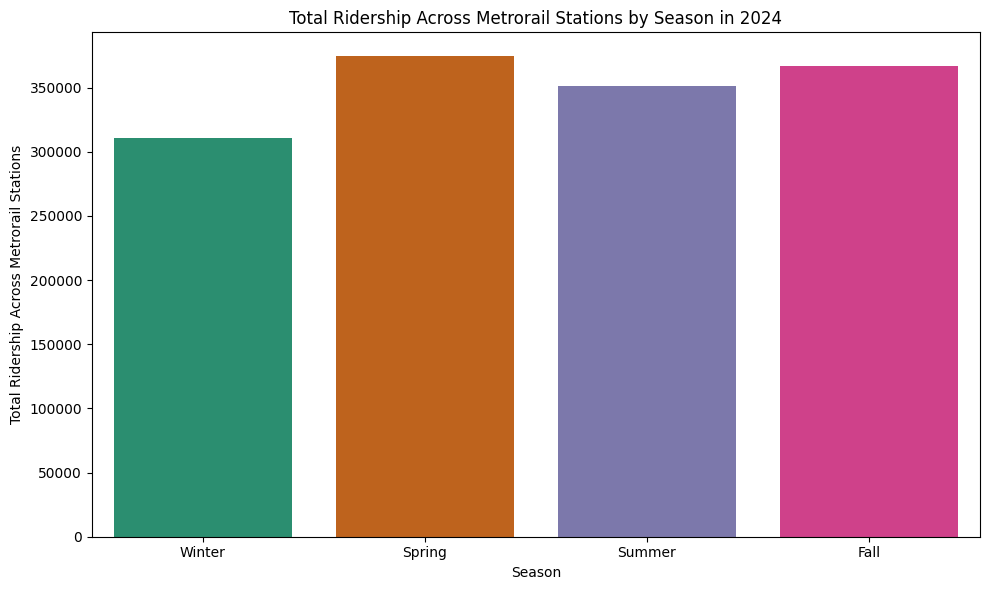

In [9]:
#HISTOGRAM OF AVERAGE DAILY RIDERSHIP BY SEASON IN 2024

season_order = ['Winter', 'Spring', 'Summer', 'Fall']

seasonal_avg_ridership = av_by_month_df.groupby('SEASON')['Total Daily Entries'].mean().reset_index()

# mult av by 98 to get the total ridership for all stations
seasonal_avg_ridership['Average Daily Entries Across All Stations'] = seasonal_avg_ridership['Total Daily Entries'] * 98

plt.figure(figsize=(10, 6))

sns.barplot(x='SEASON', y='Average Daily Entries Across All Stations', data=seasonal_avg_ridership, 
            palette="Dark2", order=season_order)

plt.title('Total Ridership Across Metrorail Stations by Season in 2024')
plt.xlabel('Season')
plt.ylabel('Total Ridership Across Metrorail Stations')
plt.tight_layout()
plt.show()



C:\Users\mayap\AppData\Local\Temp\ipykernel_26760\1609187725.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_seasonal_entries = merged_df.groupby(['MONTH', 'SEASON'])['Total Daily Entries'].mean().unstack()


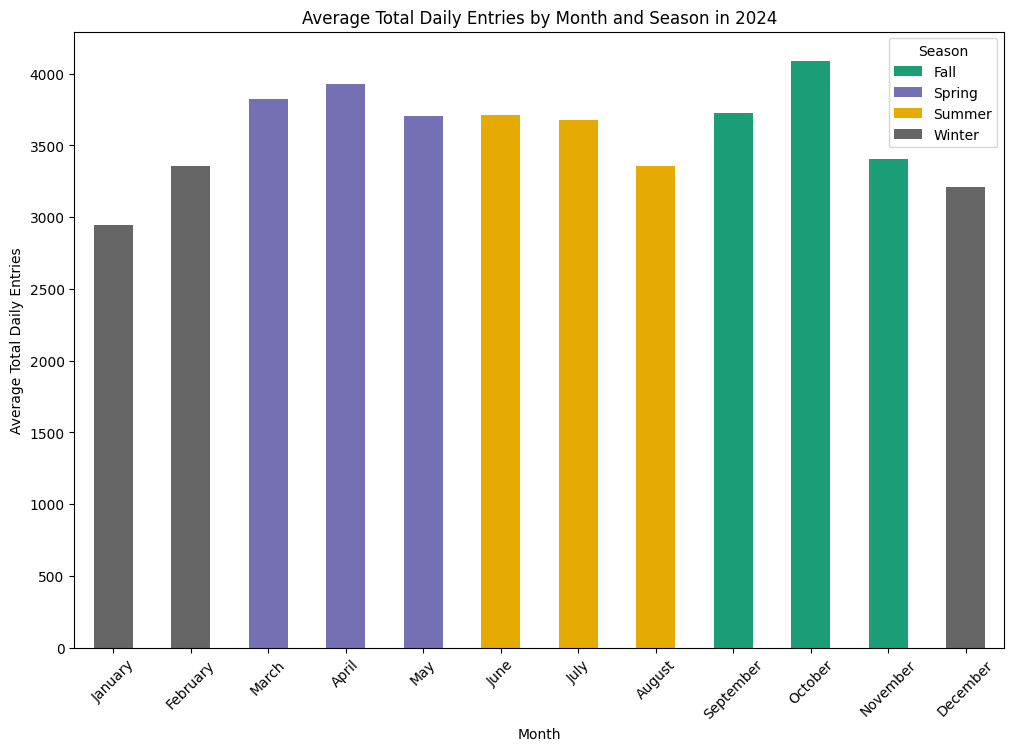

In [4]:
#HISTOGRAM OF AVERAGE TOTAL DAILY ENTRIES BY MONTH AND SEASON

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

merged_df['MONTH'] = pd.Categorical(merged_df['MONTH'], categories=month_order, ordered=True)

# group by season and month then calc avg daily entries
monthly_seasonal_entries = merged_df.groupby(['MONTH', 'SEASON'])['Total Daily Entries'].mean().unstack()

monthly_seasonal_entries.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Dark2')
plt.title('Average Total Daily Entries by Month and Season in 2024')
plt.ylabel('Average Total Daily Entries')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()



C:\Users\mayap\AppData\Local\Temp\ipykernel_26760\2232003118.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MONTH'] = pd.Categorical(filtered_df['MONTH'], categories=month_order, ordered=True)
C:\Users\mayap\AppData\Local\Temp\ipykernel_26760\2232003118.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = filtered_df.pivot_table(index='Station Name', columns='MONTH', values='Total Daily Entries', aggfunc='mean')


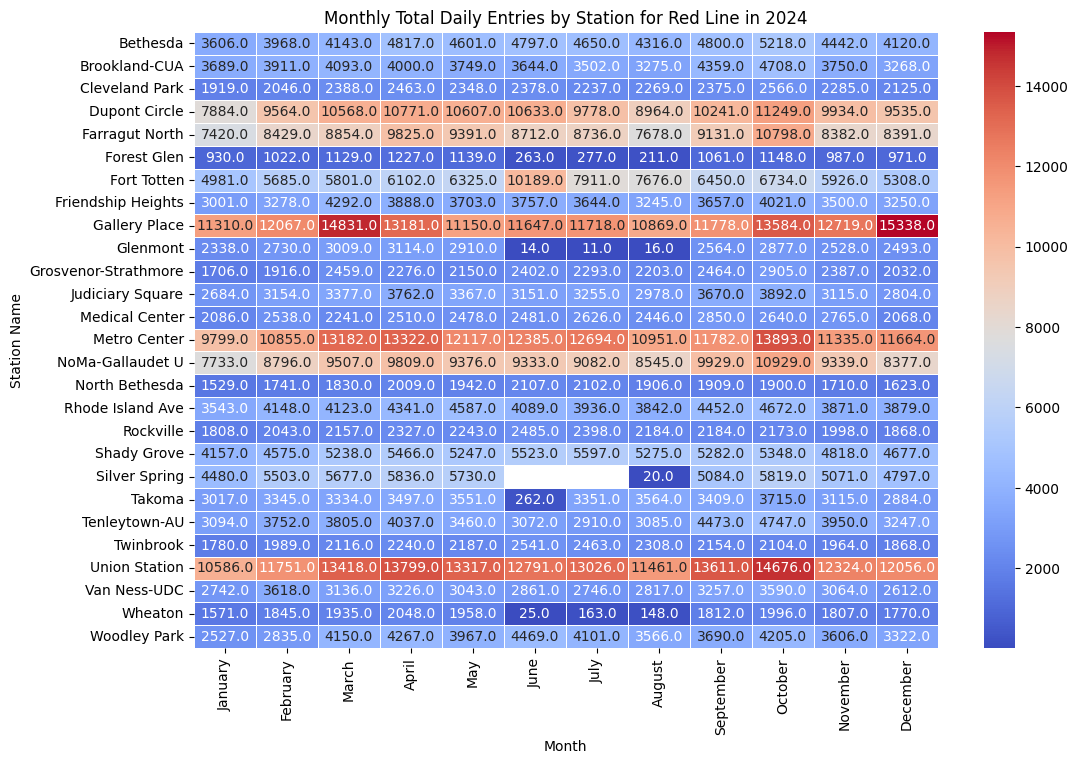

In [5]:
#HEATMAP OF MONTHLY TOTAL DAILY ENTRIES BY STATION BY LINE

user_input_line = input("Enter the line color (green, blue, yellow, red, silver, orange): ")
filtered_df = merged_df[merged_df['LINE'].str.contains(user_input_line, case=False, na=False)] #All_Months.csv so can't filter by time of week

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

filtered_df['MONTH'] = pd.Categorical(filtered_df['MONTH'], categories=month_order, ordered=True)

pivot = filtered_df.pivot_table(index='Station Name', columns='MONTH', values='Total Daily Entries', aggfunc='mean')

pivot = pivot.reindex(columns=month_order)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5)
plt.title(f'Monthly Total Daily Entries by Station for {user_input_line.capitalize()} Line in 2024')
plt.ylabel('Station Name')
plt.xlabel('Month')
plt.show()



C:\Users\mayap\AppData\Local\Temp\ipykernel_26760\2032948452.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_entries = filtered_df.groupby(["MONTH", "Station Name"])["Total Daily Entries"].mean().reset_index()


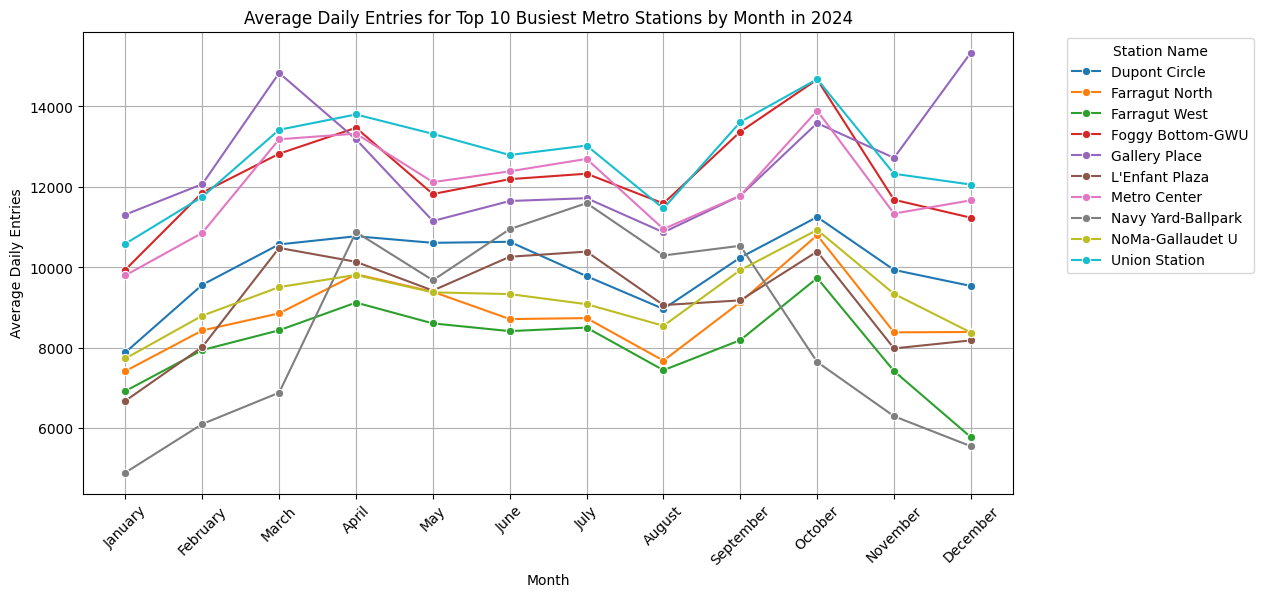

In [6]:
#LINE GRAPH OF AVERAGE DAILY ENTRIES FOR THE TOP 10 BUSIEST METRO STATIONS BY MONTH IN 2024

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
merged_df['MONTH'] = pd.Categorical(merged_df['MONTH'], categories=month_order, ordered=True)

# top 10 busiest stations based on total daily entries
top_10_stations = merged_df.groupby("Station Name")["Total Daily Entries"].sum().nlargest(10).index

filtered_df = merged_df[merged_df["Station Name"].isin(top_10_stations)]

# average daily entries per month for each station
monthly_avg_entries = filtered_df.groupby(["MONTH", "Station Name"])["Total Daily Entries"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_entries, x="MONTH", y="Total Daily Entries", hue="Station Name", marker="o")
plt.xlabel("Month")
plt.ylabel("Average Daily Entries")
plt.title("Average Daily Entries for Top 10 Busiest Metro Stations by Month in 2024")
plt.xticks(rotation=45) 
plt.legend(title="Station Name", bbox_to_anchor=(1.05, 1), loc="upper left")  
plt.grid(True)
plt.show()


In January and February, the average daily entries are at the lowest levels for all of the 10 listed stations, which can be attributed to the cold weather that discourages many people from stepping out and riding the metro.

In March, the average daily entries for Gallery Place suddenly reaches its first peak, which can be attributed to the warming weather and cherry blossom season. There are also many attractions nearby such as the National Portrait Gallery, Smithsonian American Art Museum, Capital One Arena, Shakespeare Theater, Kogo Courtyard, and more. 

In April, the average daily entries for Union Station reaches its first peak, which can be attributed to the its many attractions nearby that people can enjoy in the warming weather, such as touring government buildings, visiting the Library of Congress, enjoying the blossomg trees at the National Japanese American Memorial. Some other popular destinations nearby are the National Air and Space Museum, the National Gallery of Art, and the U.S. Botanic Garden.

From May to August, the average daily entries are at the lowest levels for 9 out of 10 of the listed stations, which can be attributed to traveling out of state or out of the country by car or plane for vacation during the hot summer months.

In September, the average daily entries for 9 out of all of the 10 listed stationsdrastically increase and reach their peak in October. This may be attributed to popular events such as the Adams Morgan Day Festival, the DC State Fair, and the DC Jazz Fest in September, as well as the Oktoberfest, the Snallygaster, the Capital City Africa Cup, and the Fall Wine Festival in October. It is also the beginning of the Fall semester, so many commutes for college-going students begin this season, along with Halloween festivites.

In November and December, the average daily entres for all of the 10 listed stations decrease except for Gallery Place, which can be attributed to dropping temperatures discourage most metro riders, except for those interested in the Christmas festivities near Gallery Place. 

***I might not include the temperature information because we're not taking temperature data and comparing it alongside this ridership data. I feel like we can make a heatmap of the highest riderships for each season in the DC area.



C:\Users\mayap\AppData\Local\Temp\ipykernel_26760\3596844328.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_entries = filtered_df.groupby(["MONTH", "Station Name"])["Total Daily Entries"].mean().reset_index()


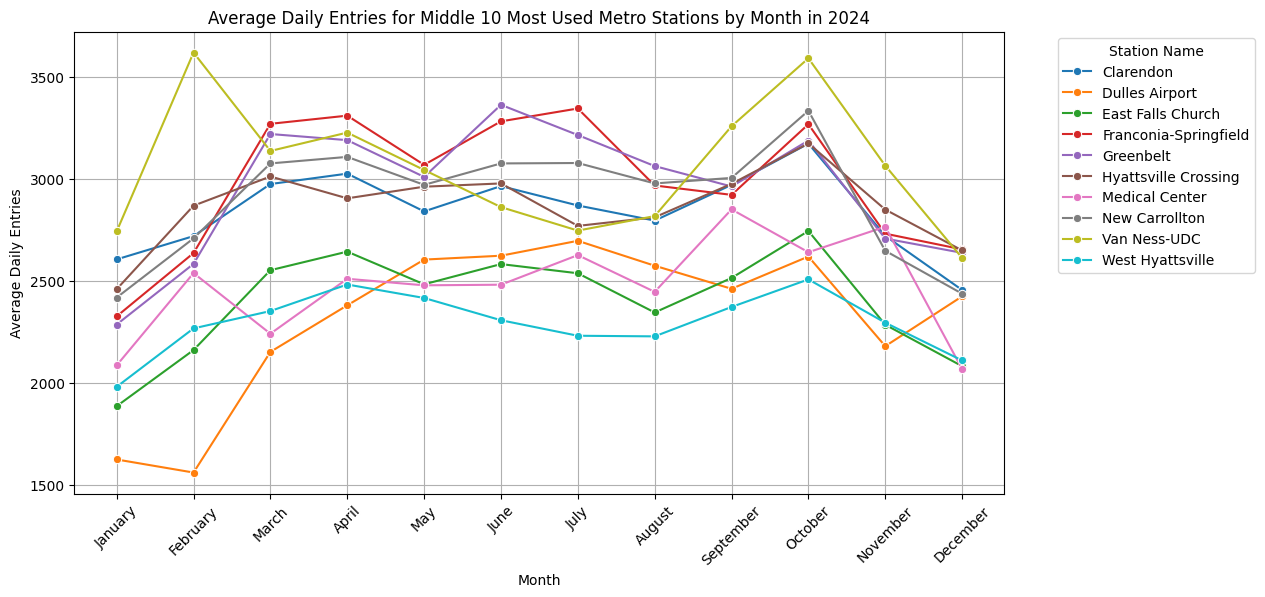

In [7]:
#LINE GRAPH OF AVERAGE DAILY ENTRIES FOR THE MIDDLE 10 MOST USED METRO STATIONS BY MONTH IN 2024

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
merged_df['MONTH'] = pd.Categorical(merged_df['MONTH'], categories=month_order, ordered=True)

# get the middle 10 stations
sorted_stations = merged_df.groupby("Station Name")["Total Daily Entries"].sum().sort_values(ascending=False)
middle_index_start = len(sorted_stations) // 2 - 5  # Start index (centered)
middle_10_stations = sorted_stations.iloc[middle_index_start : middle_index_start + 10].index

filtered_df = merged_df[merged_df["Station Name"].isin(middle_10_stations)]

# average daily entries per month for each station
monthly_avg_entries = filtered_df.groupby(["MONTH", "Station Name"])["Total Daily Entries"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_entries, x="MONTH", y="Total Daily Entries", hue="Station Name", marker="o")
plt.xlabel("Month")
plt.ylabel("Average Daily Entries")
plt.title("Average Daily Entries for Middle 10 Most Used Metro Stations by Month in 2024")
plt.xticks(rotation=45) 
plt.legend(title="Station Name", bbox_to_anchor=(1.05, 1), loc="upper left")  
plt.grid(True)
plt.show()


C:\Users\mayap\AppData\Local\Temp\ipykernel_26760\988456825.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg_entries = filtered_df.groupby(["MONTH", "Station Name"])["Total Daily Entries"].mean().reset_index()


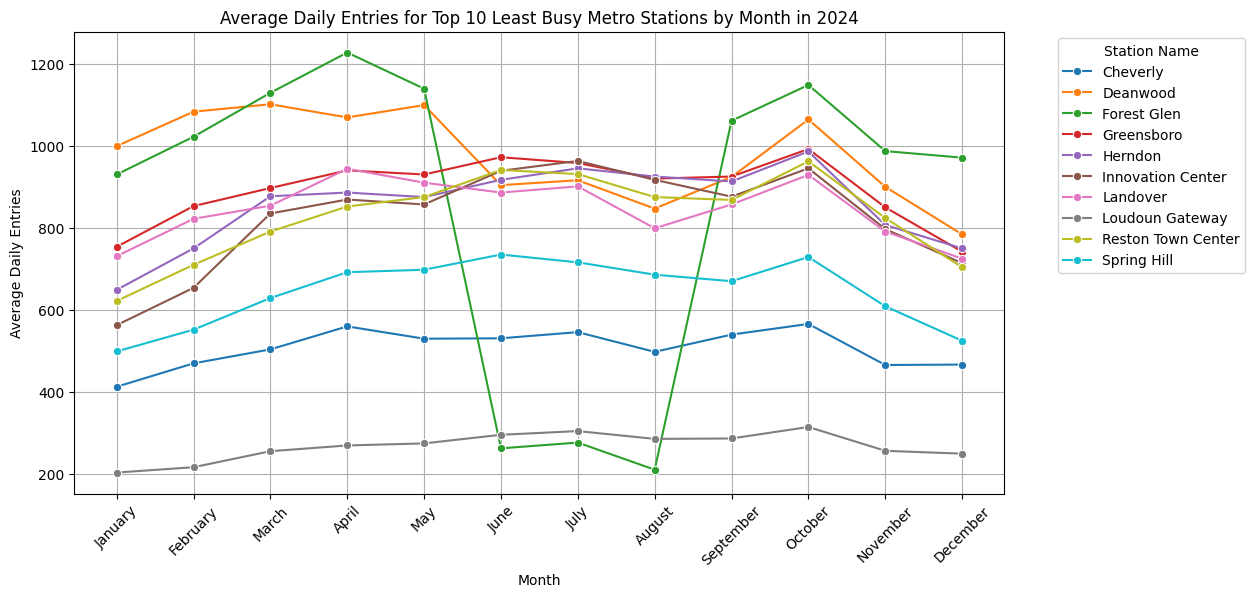

In [8]:
#LINE GRAPH OF AVERAGE DAILY ENTRIES FOR THE MIDDLE 10 LEAST BUSY METRO STATIONS BY MONTH IN 2024

month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
merged_df['MONTH'] = pd.Categorical(merged_df['MONTH'], categories=month_order, ordered=True)

# top 10 least busy stations based on total daily entries
top_10_stations = merged_df.groupby("Station Name")["Total Daily Entries"].sum().nsmallest(10).index

filtered_df = merged_df[merged_df["Station Name"].isin(top_10_stations)]

# average daily entries per month for each station
monthly_avg_entries = filtered_df.groupby(["MONTH", "Station Name"])["Total Daily Entries"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_entries, x="MONTH", y="Total Daily Entries", hue="Station Name", marker="o")
plt.xlabel("Month")
plt.ylabel("Average Daily Entries")
plt.title("Average Daily Entries for Top 10 Least Busy Metro Stations by Month in 2024")
plt.xticks(rotation=45) 
plt.legend(title="Station Name", bbox_to_anchor=(1.05, 1), loc="upper left")  
plt.grid(True)
plt.show()